In [29]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt




In [2]:
# Import the data
lending_df = pd.read_csv('Resources/lending_data.csv')
lending_df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


Based on what we know about the two different models, I would predict that the logistic model would per

In [4]:
# Split the data into X_train, X_test, y_train, y_test
X = lending_df.drop(['loan_status'], axis=1)
y= lending_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
X.sample(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
11698,9300.0,7.065,47100,0.363057,3,0,17100
64483,10800.0,7.701,53100,0.435028,5,1,23100
2555,8700.0,6.819,44800,0.330357,3,0,14800
68376,9800.0,7.280,49100,0.389002,4,0,19100
51671,8200.0,6.614,42800,0.299065,2,0,12800
42928,10400.0,7.525,51400,0.416342,4,1,21400
60858,10100.0,7.436,50600,0.407115,4,1,20600
70135,8800.0,6.849,45000,0.333333,3,0,15000
57621,9800.0,7.305,49300,0.391481,4,0,19300
70126,9100.0,7.004,46500,0.354839,3,0,16500


In [109]:
# Train a Logistic Regression model print the model score

0.9908171687990095

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [19]:
print(f"Training Score: : {model.score(X_train, y_train)}")
print(f"Test Score: : {model.score(X_test, y_test)}")

Training Score: : 0.9919177328380795
Test Score: : 0.9922616591002889


In [20]:
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18658,    95],
       [   55,   576]])

In [21]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f'Accuracy: {accuracy}')
      

Accuracy: 0.9922616591002889


In [22]:
# Train a Random Forest Classifier model and print the model score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train.values.ravel())


In [27]:
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


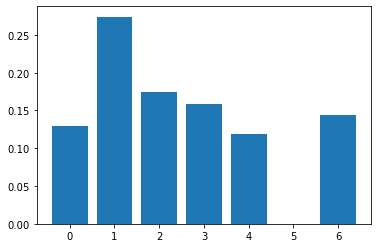

In [30]:
features = rfc.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

The performance for both models was surprisingly similar . the logistic model was just a little bit more accurate as predicted 